<a href="https://colab.research.google.com/github/tameralqadi/Logistic-Regression/blob/main/logistic(Tamer).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 0, Loss: 0.6931471805599453
Epoch 100, Loss: 0.0665609597638373
Epoch 200, Loss: 0.03492693805012101
Epoch 300, Loss: 0.02393176289715332
Epoch 400, Loss: 0.018316011387467374
Epoch 500, Loss: 0.014894365777233843
Epoch 600, Loss: 0.01258464419969676
Epoch 700, Loss: 0.010917147703633783
Epoch 800, Loss: 0.009654708260872395
Epoch 900, Loss: 0.008664477279333902
Intercept (w0): -0.3507408645053583
Coefficients: [-0.54432567 -2.00364068  3.06019384  1.34114902]


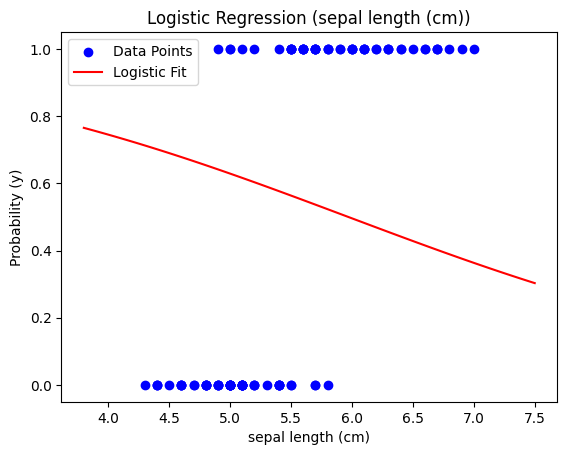

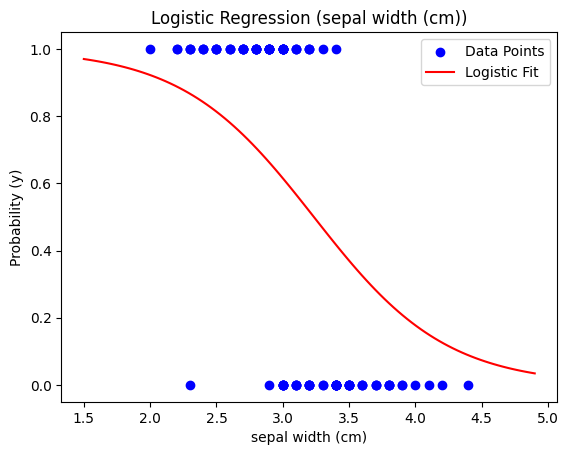

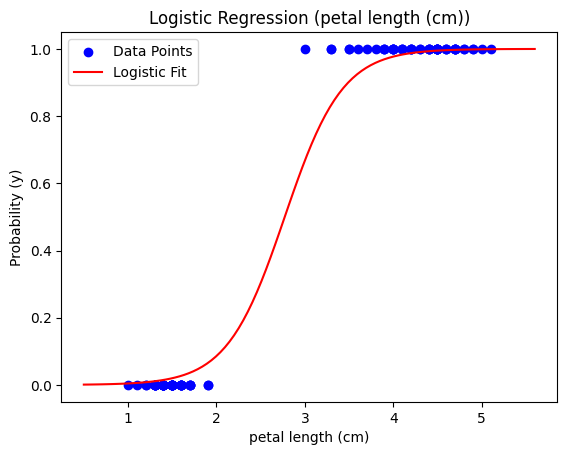

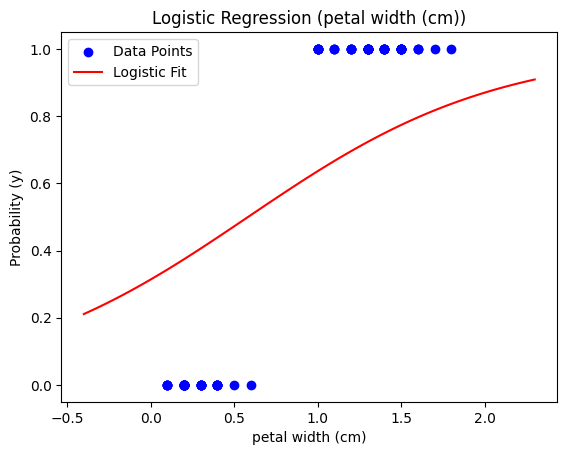

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Gradient Descent for Logistic Regression
def gradient_descent(X, y, learning_rate=0.1, epochs=1000):
    m, n = X.shape
    W = np.zeros(n + 1)  # include bias
    X_b = np.c_[np.ones((m, 1)), X]  # add x0=1

    for epoch in range(epochs):
        # Logistic prediction
        y_pred = sigmoid(X_b.dot(W))
        error = y_pred - y
        gradient = (1/m) * X_b.T.dot(error)
        W -= learning_rate * gradient

        if epoch % 100 == 0:
            # loss
            loss = -(1/m) * np.sum(y*np.log(y_pred ) + (1-y)*np.log(1-y_pred))
            print(f"Epoch {epoch}, Loss: {loss}")

    return W

if __name__ == "__main__":
    # 1. Load Iris dataset
    iris = load_iris()
    X = iris.data
    y = iris.target

    # 2. Select only two classes: setosa (0) and versicolor (1)
    mask = (y == 0) | (y == 1)
    X = X[mask]
    y = y[mask]

    # 3. Train logistic regression model on all features
    weights = gradient_descent(X, y, learning_rate=0.1, epochs=1000)

    print("Intercept (w0):", weights[0])
    print("Coefficients:", weights[1:])

    # 4. Plot each feature against the class (for visualization)
    feature_names = iris.feature_names
    for i in range(X.shape[1]):
        plt.figure()
        plt.scatter(X[:, i], y, color='blue', label='Data Points')
        # Logistic curve
        X_line = np.linspace(X[:, i].min()-0.5, X[:, i].max()+0.5, 100).reshape(100, 1)
        # For plotting, use only the current feature, keep others at mean
        X_plot = np.ones((100, X.shape[1])) * X.mean(axis=0)
        X_plot[:, i] = X_line[:, 0]
        X_plot_b = np.c_[np.ones((100, 1)), X_plot]
        y_line = sigmoid(X_plot_b.dot(weights))
        plt.plot(X_line, y_line, color='red', label='Logistic Fit')
        plt.xlabel(feature_names[i])
        plt.ylabel('Probability (y)')
        plt.title(f'Logistic Regression ({feature_names[i]})')
        plt.legend()
        plt.show()
